C:\Users\mujdat\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


0.6355673756521115


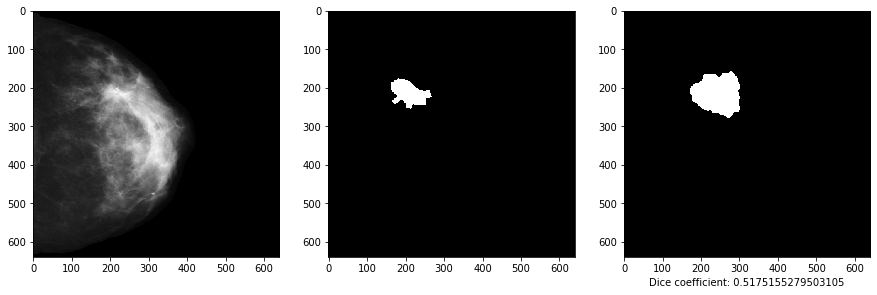

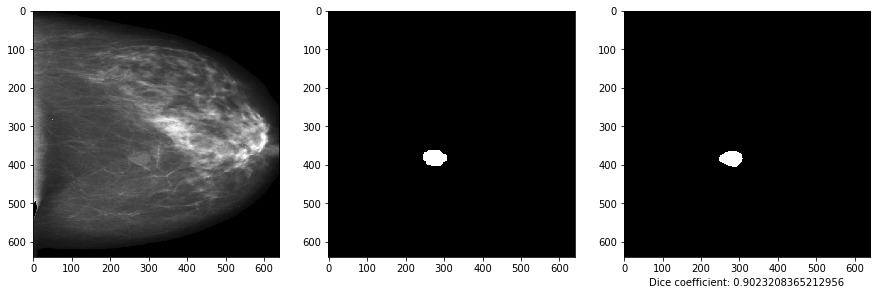

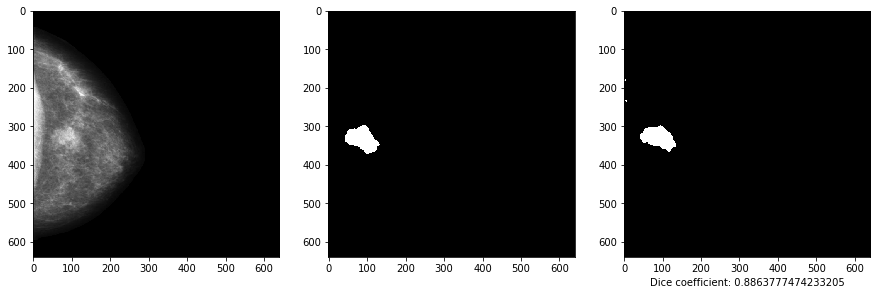

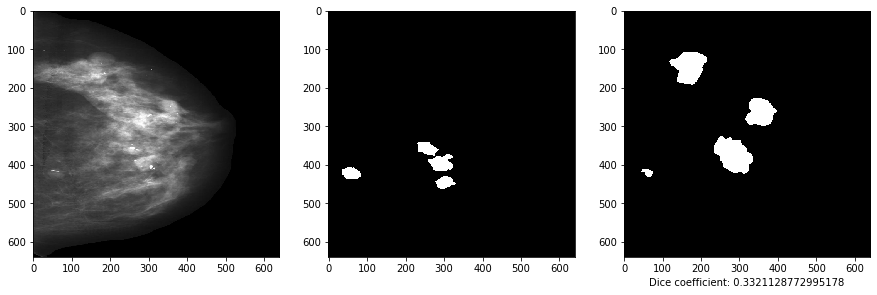

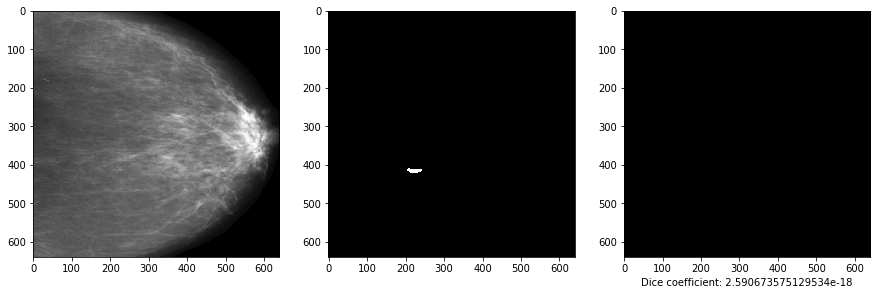

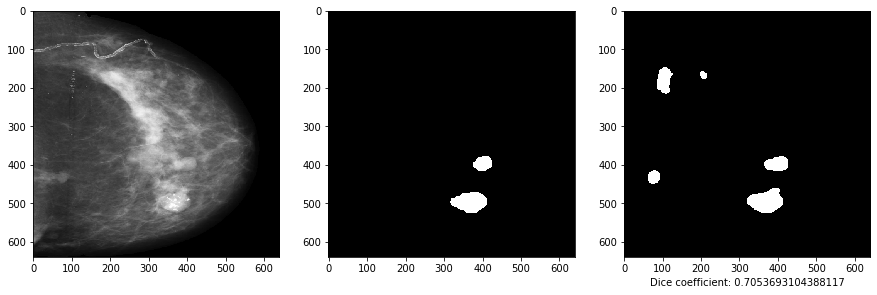

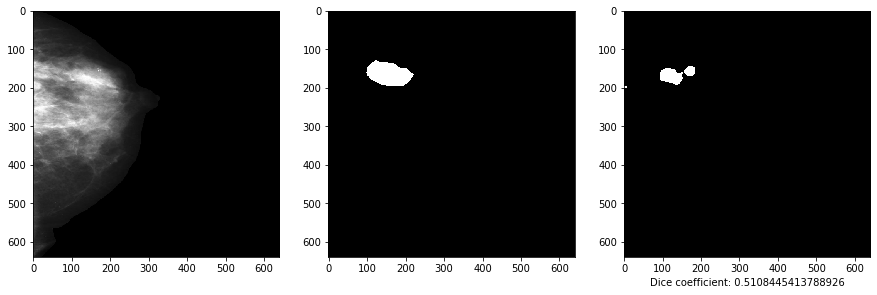

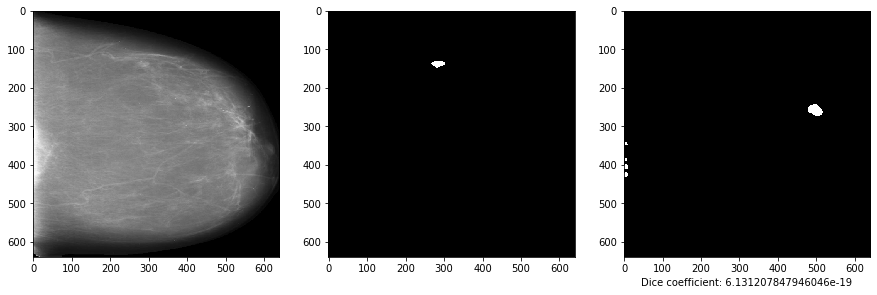

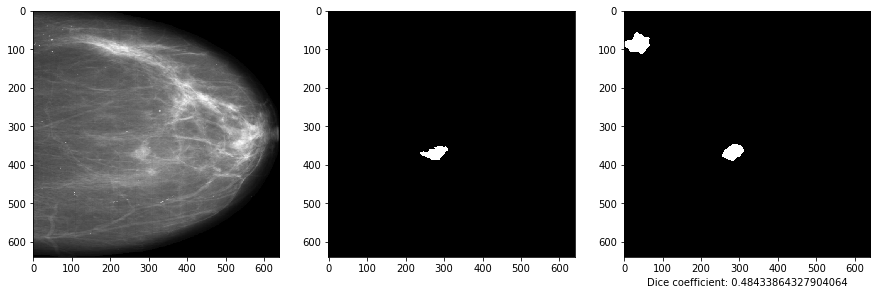

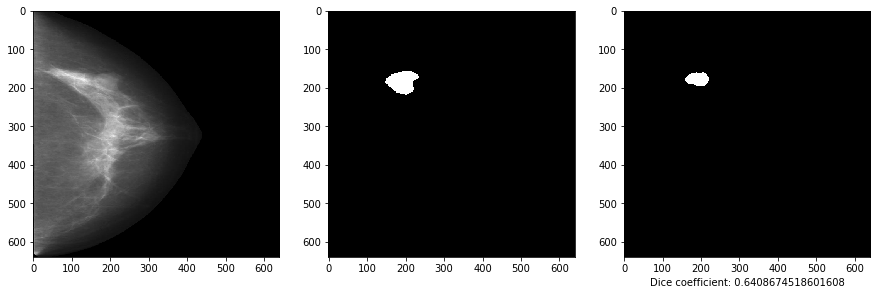

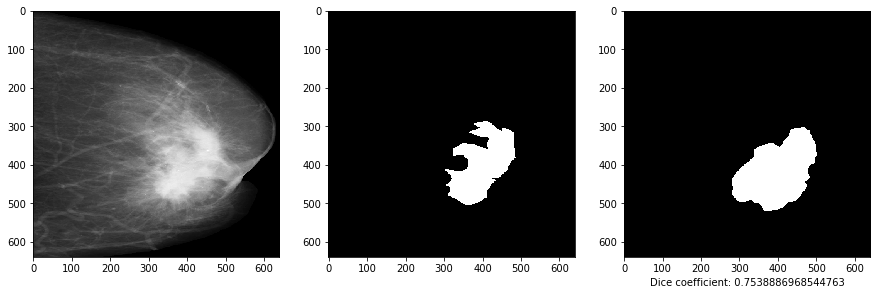

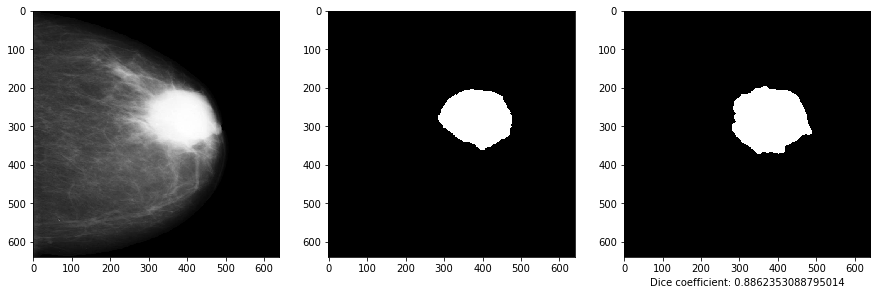

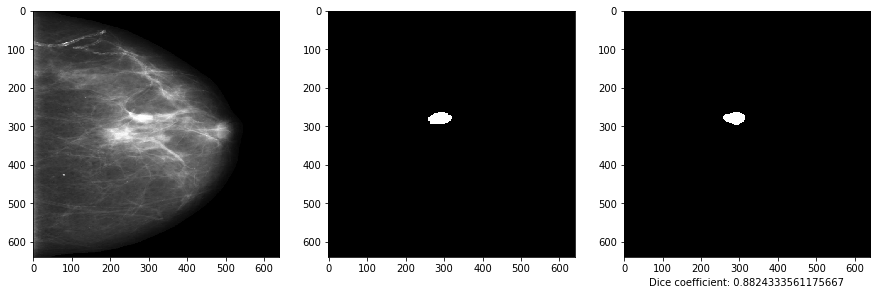

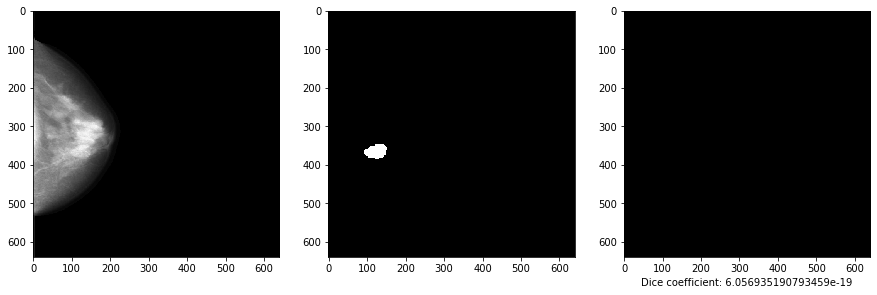

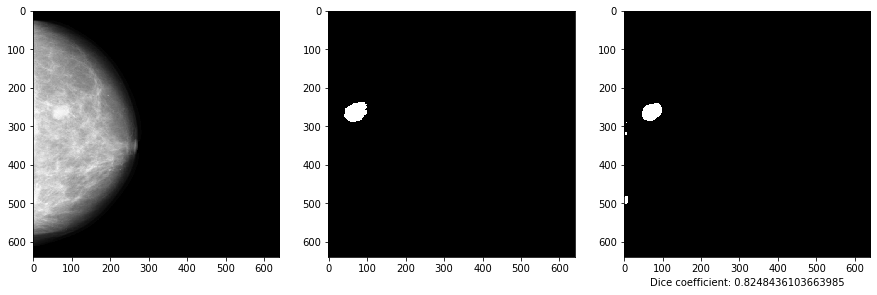

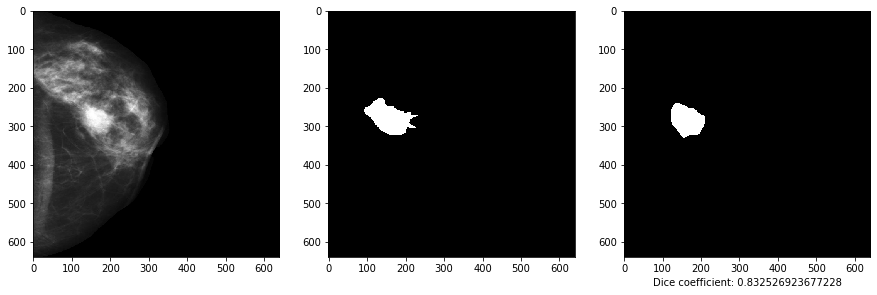

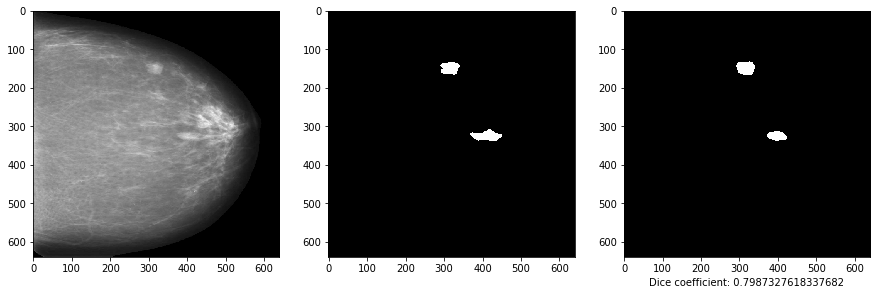

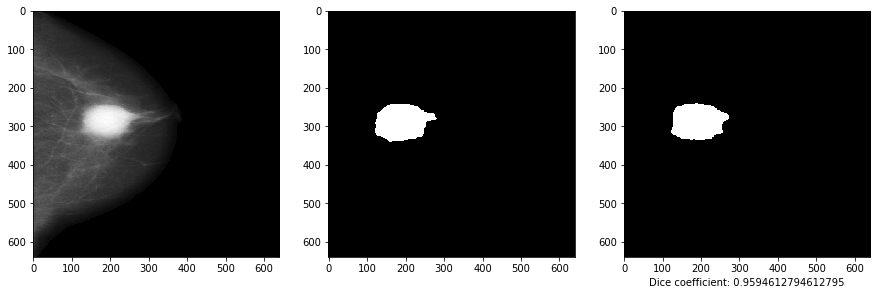

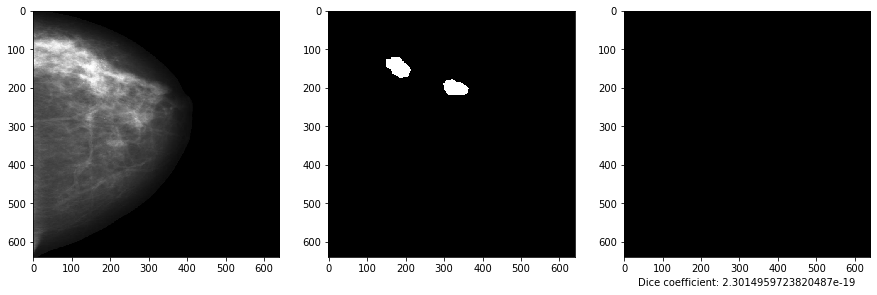

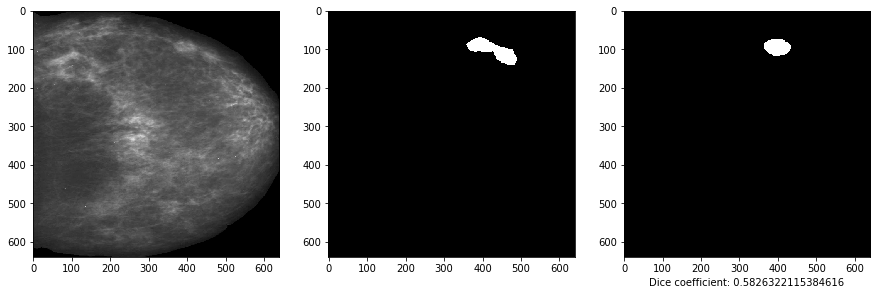

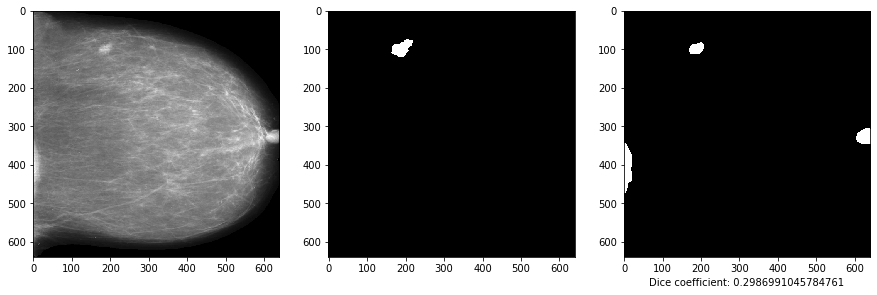

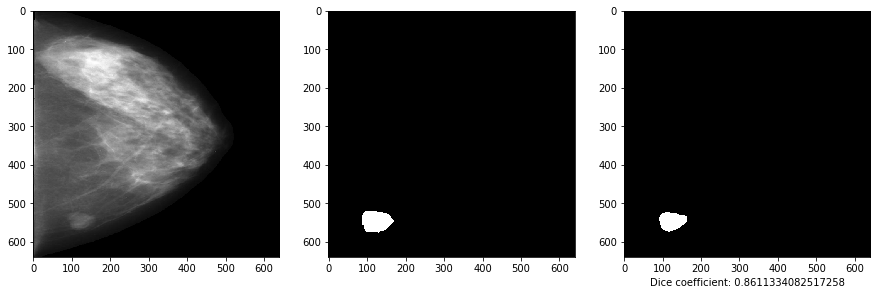

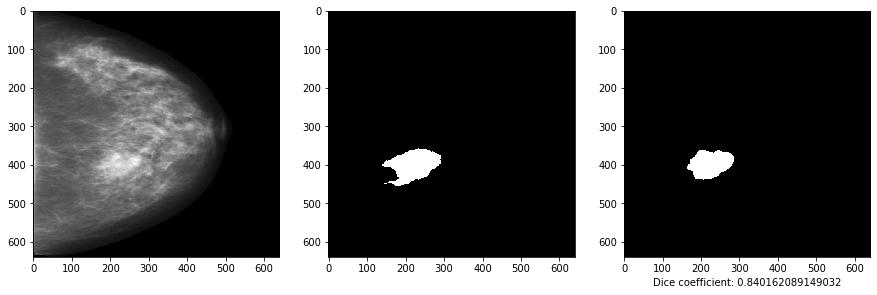

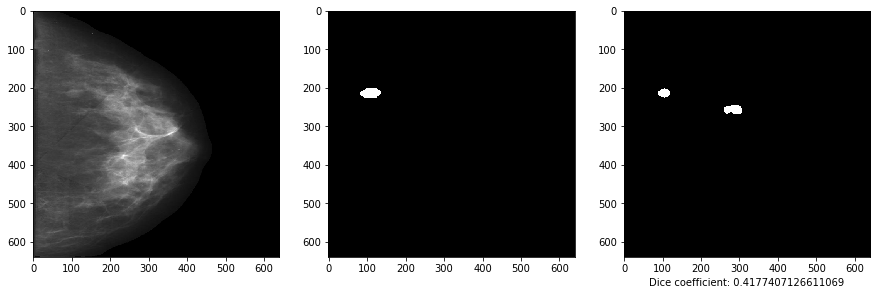

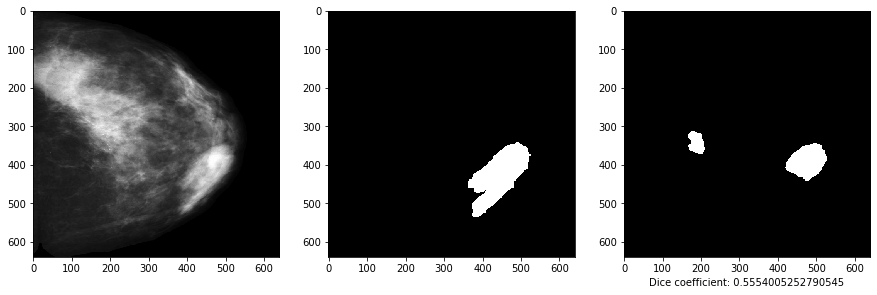

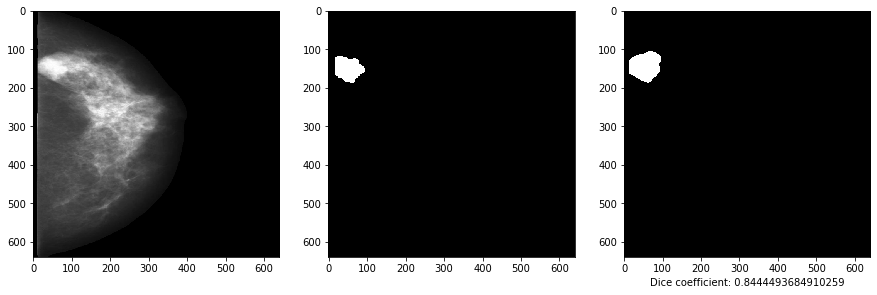

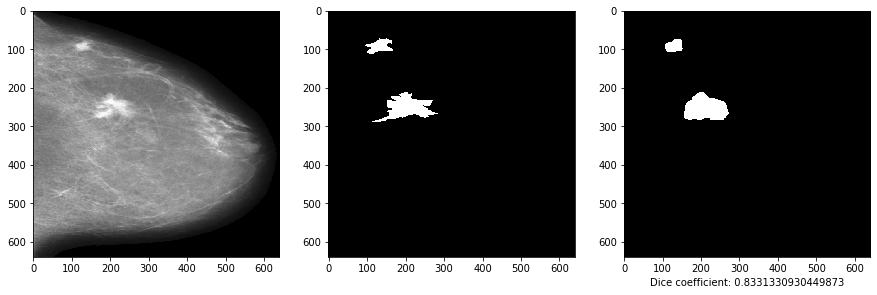

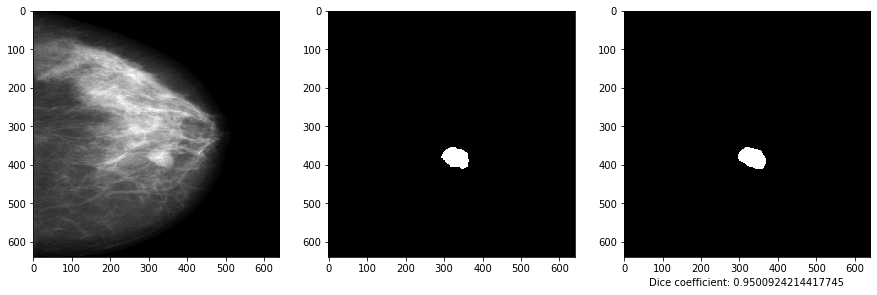

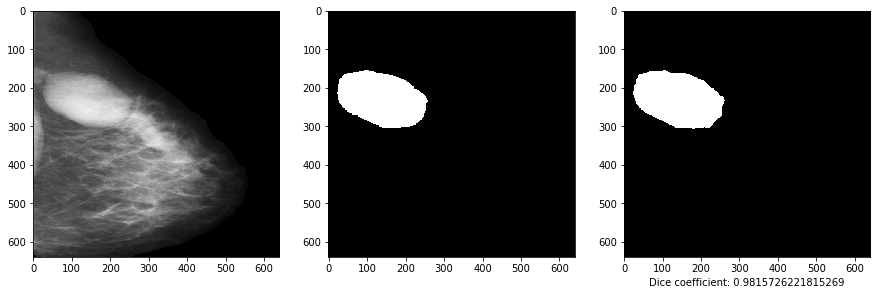

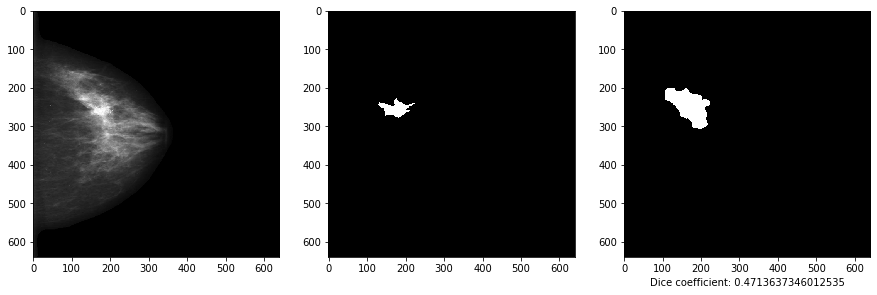

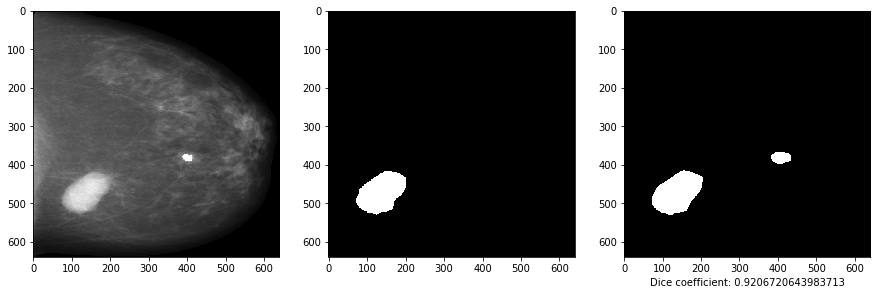

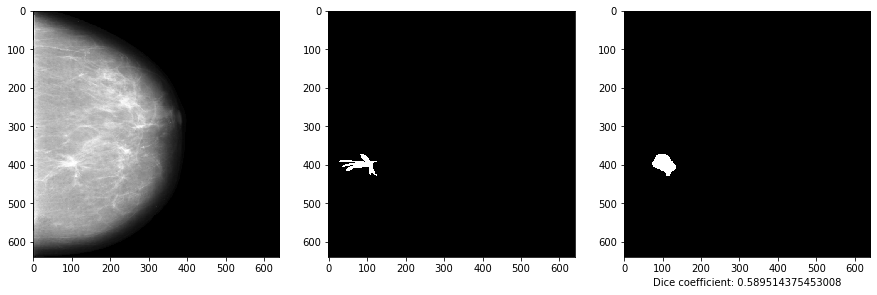

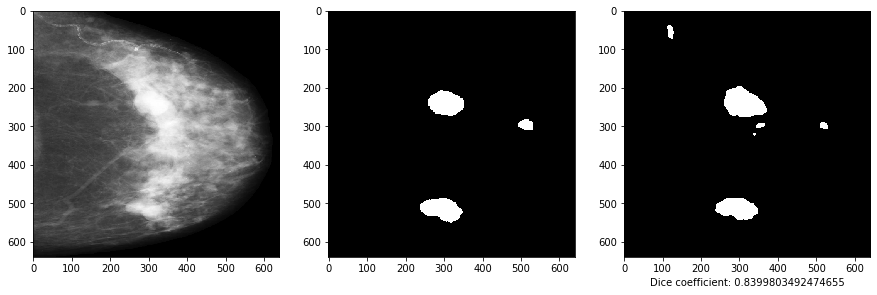

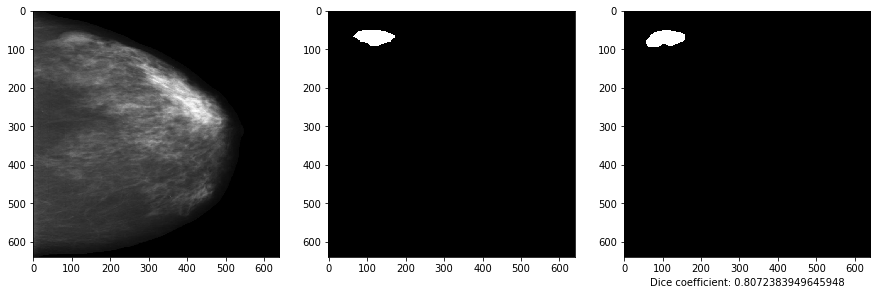

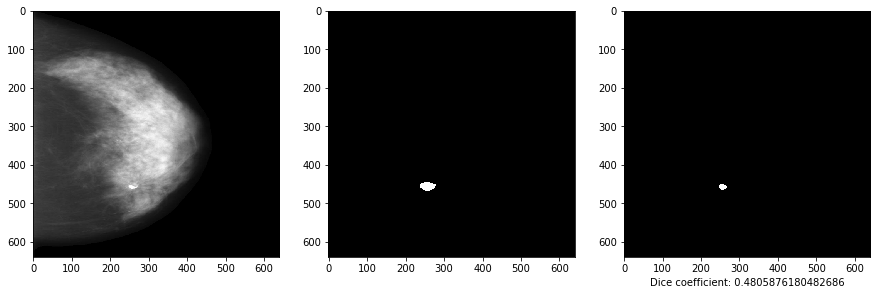

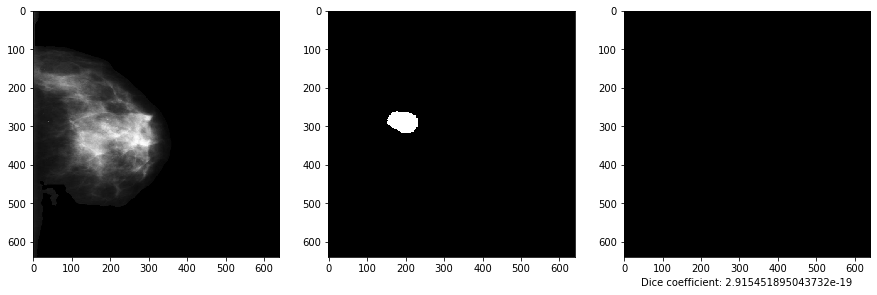

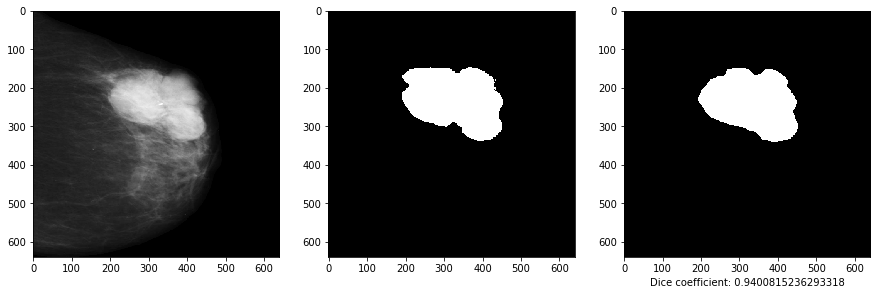

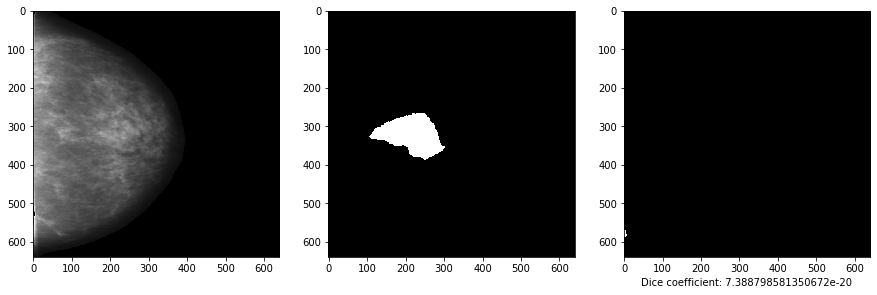

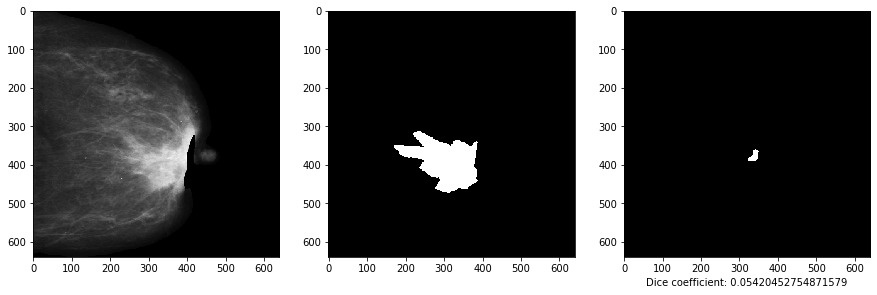

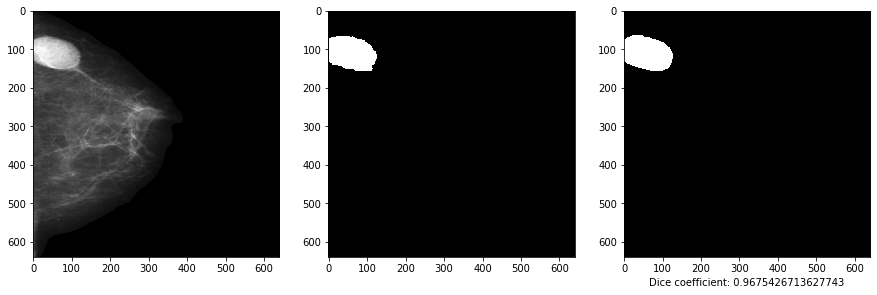

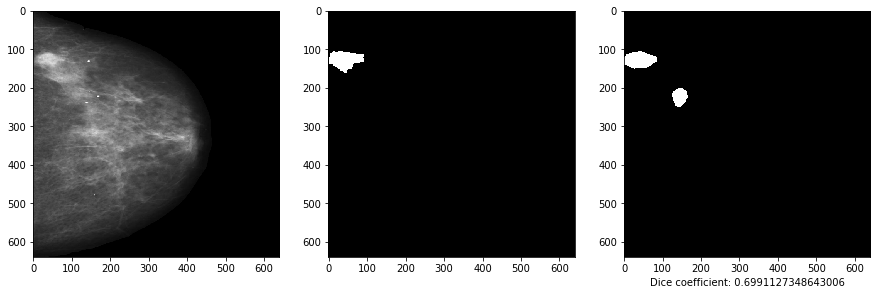

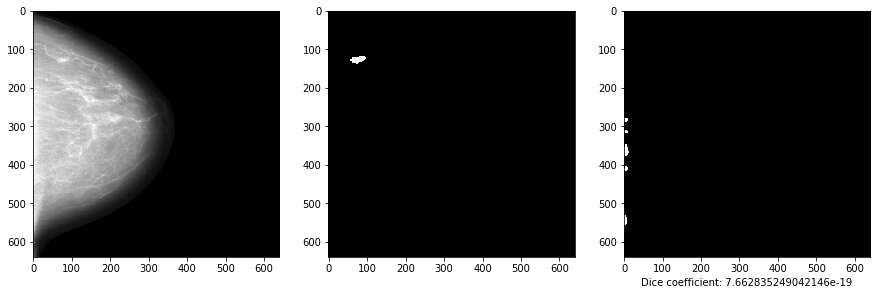

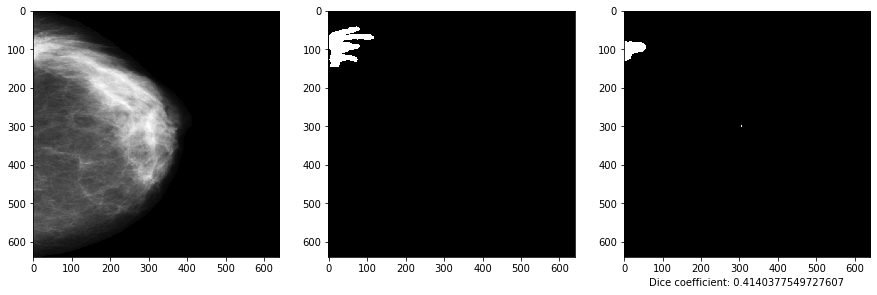

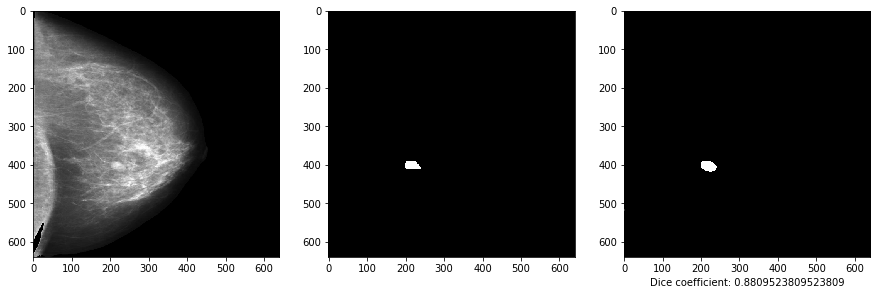

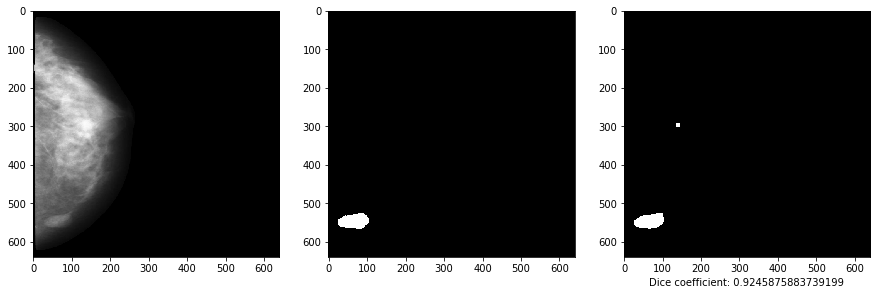

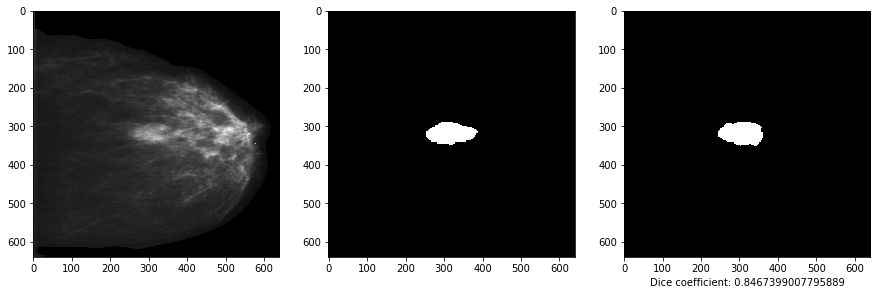

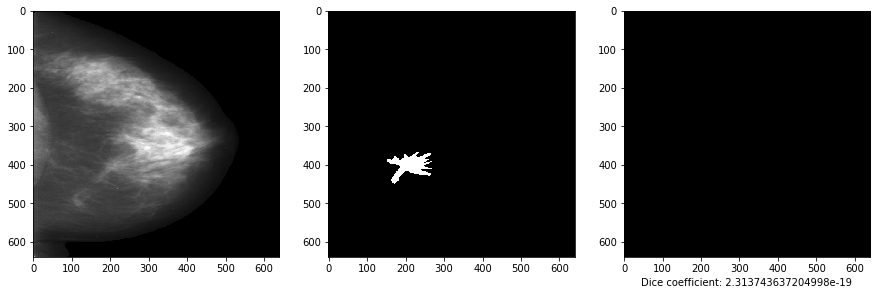

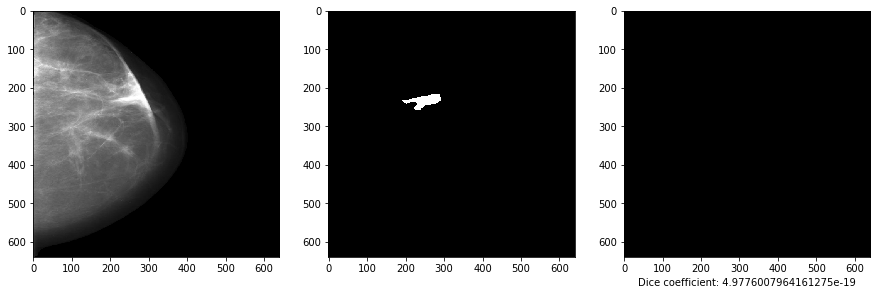

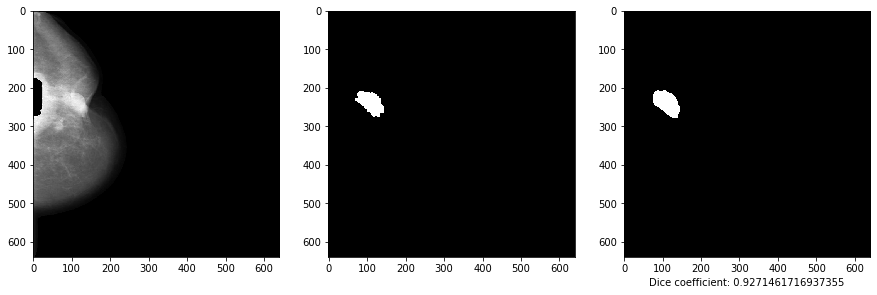

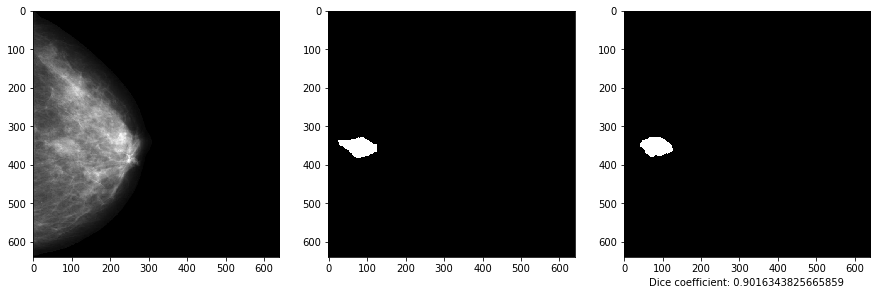

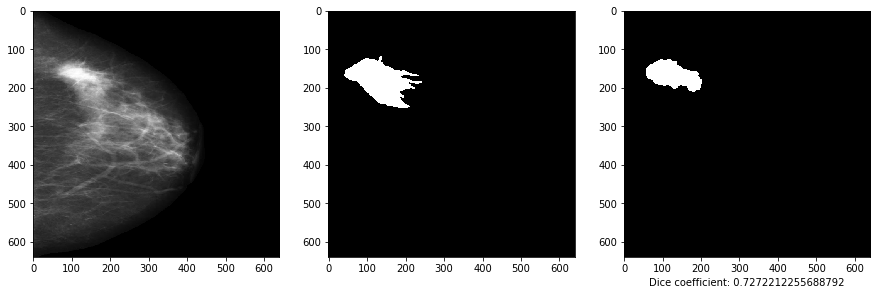

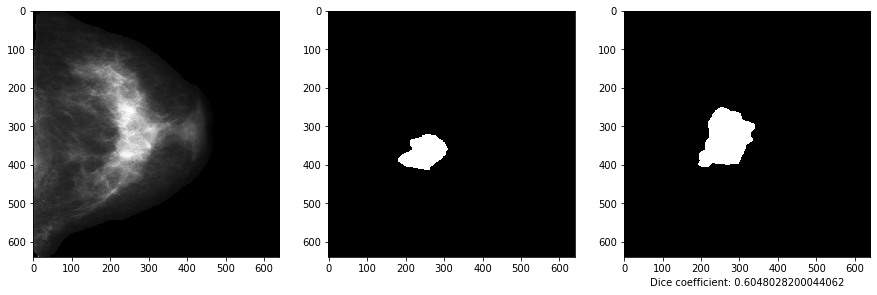

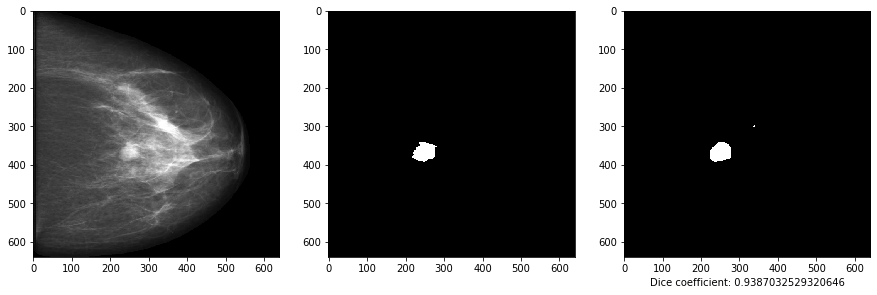

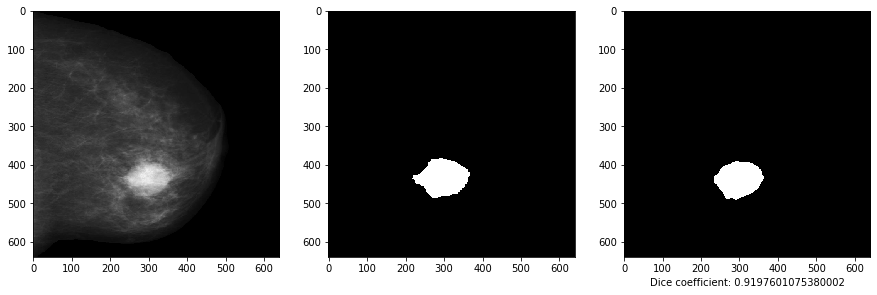

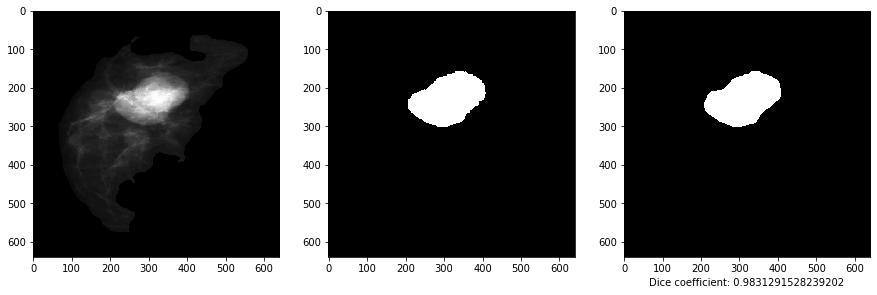

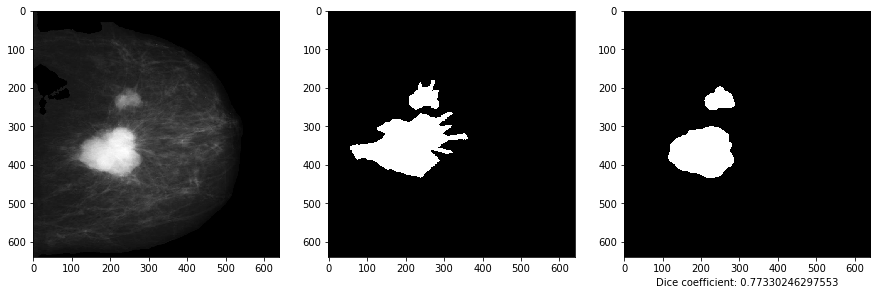

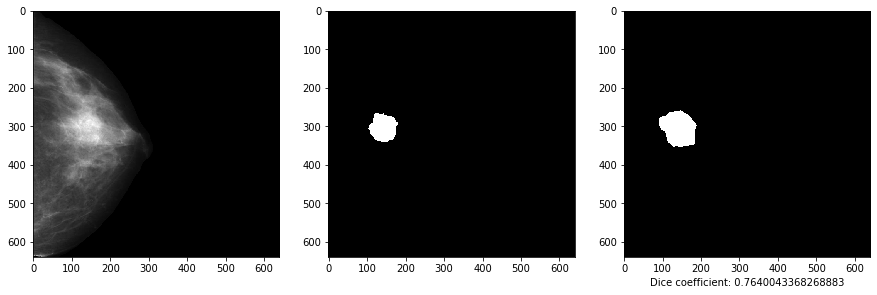

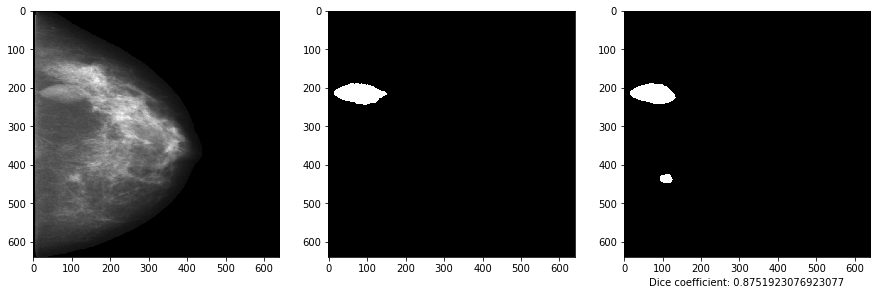

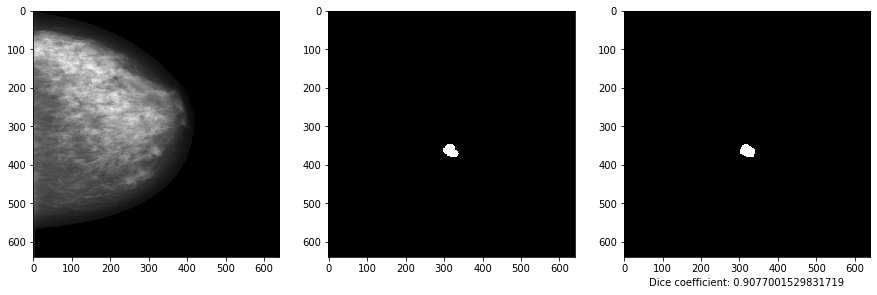

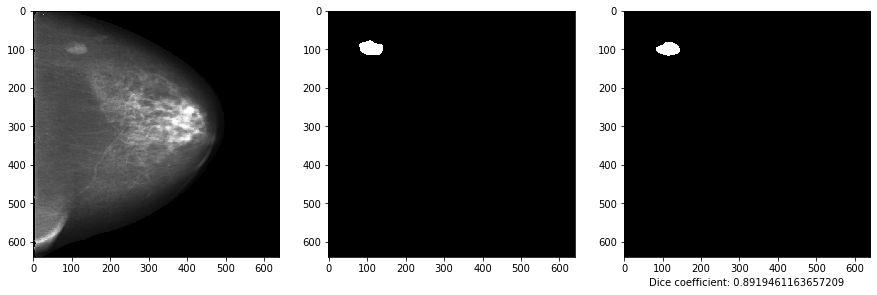

In [23]:
# MASS SEGMENTATION TEST RESULTS
# There are a total of 60 mammograms in the testing folder. Here is the result of each mammogram, its ground truth and the U-net++Xception prediction

import imageio
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

target_folder='pred/'
dc=list() 

def dice_coef(y_true, y_pred):
    smooth = 1e-15
    intersection = sum(sum(y_true * y_pred))
    score = (2 * intersection + smooth) / (sum(sum(y_true)) + sum(sum(y_pred)) + smooth)
    return score

for num in range (0,60):                       # There are 60 test images
    mg_name = str(num) + '.png'                # input mammogram
    gt_name = str(num) + '_gt.png'             # ground truth
    pred_name = str(num) + '_predict_v013.png' # unet++xception prediction
    
    mg = cv2.imread(os.path.join(target_folder,mg_name))
    gt = cv2.imread(os.path.join(target_folder,gt_name))
    gt = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
    pred = cv2.imread(os.path.join(target_folder,pred_name))
    pred = cv2.cvtColor(pred, cv2.COLOR_BGR2GRAY)
    
    ret,thresh_pred = cv2.threshold(pred,127,1,cv2.THRESH_BINARY) 
    ret,thresh_gt = cv2.threshold(gt,127,1,cv2.THRESH_BINARY) 
    dc.append(dice_coef(thresh_gt,thresh_pred))
    
    fig = plt.figure()
    fig.set_size_inches(15,15)
    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(mg)
    ax2 = fig.add_subplot(1,3,2)
    ax2.imshow(thresh_gt,cmap=plt.cm.gray)
    ax3 = fig.add_subplot(1,3,3)
    ax3.imshow(thresh_pred,cmap=plt.cm.gray)
    ax3.set_xlabel('Dice coefficient: {}'.format(dc[num]))

    
print(np.mean(dc))    